## Shadow removal 

This notebook keeps a record on how to remove shadow, which is based on the paper by [Finlayson, Drew and Lu](https://www2.cs.sfu.ca/~mark/ftp/Eccv04/). The code written here is based on a post [here](https://mathematica.stackexchange.com/questions/7414/image-shadow-removal-in-mathematica). 
The path image is used can be download from [here](http://www.cs.sfu.ca/~mark/ftp/Eccv04/path.jpg).

NOTE: I wasn't able to convert the mathematica code from the post to Python completely, i.e. I didn't manage to remove the shadow...

In [1]:
from pathlib import Path
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import os
import cv2

Our resized image has the shape: (322, 402, 3)


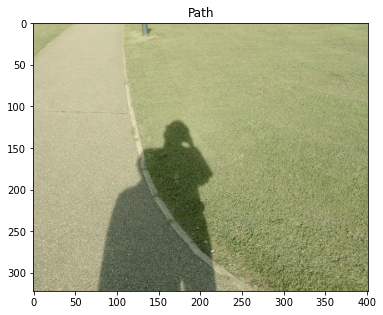

In [2]:
path_img = cv2.imread("path.jpg", 1)
path_img = cv2.cvtColor(path_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.title('Path');
print("Our resized image has the shape: {}".format(path_img.shape))
plt.imshow(path_img)
plt.show()

In [3]:
# parameters kernel size and sigma 
gblur = cv2.GaussianBlur(path_img, (5,5),0)

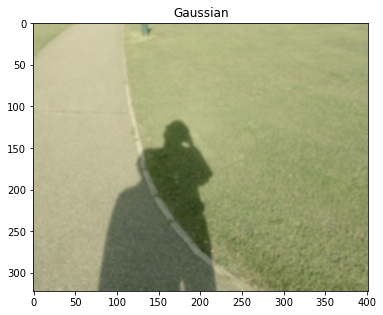

In [4]:
plt.figure(figsize=(6,6))
plt.imshow(gblur)
plt.title('Gaussian');
plt.show()

In [5]:
# mean shift filter to blurr the texture 
blurr = cv2.pyrMeanShiftFiltering(gblur,10,40) 

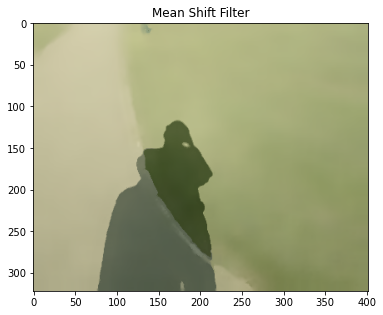

In [6]:
plt.figure(figsize=(6,6))
plt.imshow(blurr)
plt.title('Mean Shift Filter');
plt.show()

In [7]:
# set threshold to find the region of shadow 
blurr =  cv2.cvtColor(blurr, cv2.COLOR_RGB2GRAY)

In [8]:
ret,th1 = cv2.threshold(blurr,115,255,cv2.THRESH_BINARY)

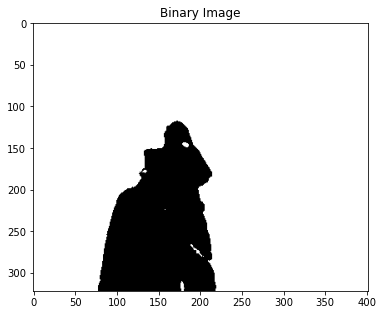

In [9]:
plt.figure(figsize=(6,6))
plt.imshow(th1, 'gray')
plt.title('Binary Image');
plt.show()

In [10]:
# two parameters need to play with in the canny edge detection
minval = 100
maxval = 240
canny_bF = cv2.Canny(th1, minval, maxval)

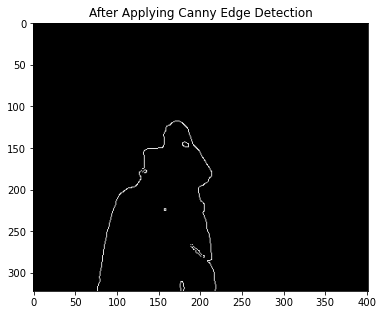

In [11]:
plt.figure(figsize=(6,6))
plt.imshow(canny_bF, cmap = 'gray')
plt.title('After Applying Canny Edge Detection');
plt.show()

In [12]:
# find the gradient in each direction
dx = cv2.Sobel(th1/255,cv2.CV_64F,1,0,ksize=5)
dy = cv2.Sobel(th1/255,cv2.CV_64F,0,1,ksize=5)

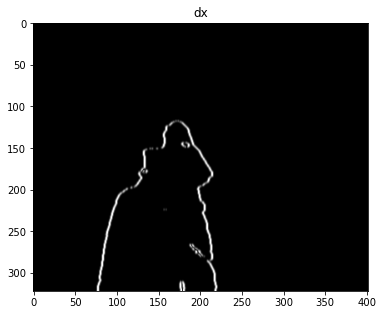

In [13]:
plt.figure(figsize=(6,6))
plt.imshow(np.abs(dx), cmap = 'gray')
plt.title('dx');
plt.show()

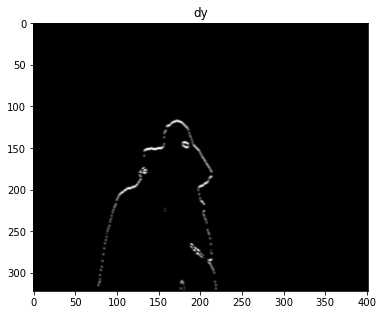

In [14]:
plt.figure(figsize=(6,6))
plt.imshow(np.abs(dy), cmap = 'gray')
plt.title('dy');
plt.show()

In [15]:
edgePixels = np.where(canny_bF/255 == 1)

In [16]:
normalDirection = np.column_stack((dy[edgePixels[0],edgePixels[1]], dx[edgePixels[0],edgePixels[1]])).T

In [17]:
gblur_p = cv2.GaussianBlur(path_img, (5,5),0)/255

In [18]:
colorsInsideShadow = gblur_p[np.floor(edgePixels + normalDirection*40/255).astype(int)]

In [19]:
colorsOutsideShadow = gblur_p[np.floor(edgePixels - normalDirection*40/255).astype(int)]